## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras import optimizers
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 18s 350us/step - loss: 1.9512 - acc: 0.2979 - val_loss: 1.7558 - val_acc: 0.3716
Epoch 2/500
50000/50000 [==============================] - 15s 309us/step - loss: 1.7216 - acc: 0.3851 - val_loss: 1.6738 - val_acc: 0.3986
Epoch 3/500
50000/50000 [==============================] - 17s 333us/step - loss: 1.6113 - acc: 0.4240 - val_loss: 1.5764 - val_acc: 0.4435
Epoch 4/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.5508 - acc: 0.4485 - val_loss: 1.5357 - val_acc: 0.4498
Epoch 5/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.5104 - acc: 0.4606 - val_loss: 1.5000 - val_acc: 0.4665
Epoch 6/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.4585 - acc: 0.4801 - val_loss: 1.4774 - val_acc: 0.4747
Epoch 7/500
50000/50000 [==============================] - 18s

Epoch 57/500
50000/50000 [==============================] - 16s 326us/step - loss: 0.5771 - acc: 0.7930 - val_loss: 1.9415 - val_acc: 0.5091
Epoch 58/500
50000/50000 [==============================] - 16s 318us/step - loss: 0.5679 - acc: 0.7957 - val_loss: 1.9659 - val_acc: 0.5051
Epoch 59/500
50000/50000 [==============================] - 16s 319us/step - loss: 0.5414 - acc: 0.8058 - val_loss: 1.9796 - val_acc: 0.5083
Epoch 60/500
50000/50000 [==============================] - 16s 323us/step - loss: 0.5268 - acc: 0.8114 - val_loss: 2.0942 - val_acc: 0.5049
Epoch 61/500
50000/50000 [==============================] - 16s 323us/step - loss: 0.5395 - acc: 0.8044 - val_loss: 2.0224 - val_acc: 0.5106
Epoch 62/500
50000/50000 [==============================] - 16s 322us/step - loss: 0.5120 - acc: 0.8167 - val_loss: 2.1171 - val_acc: 0.5146
Epoch 63/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.5124 - acc: 0.8147 - val_loss: 2.0802 - val_acc: 0.5104
Epoch 64/500


Epoch 115/500
50000/50000 [==============================] - 25s 496us/step - loss: 0.2625 - acc: 0.9053 - val_loss: 3.3691 - val_acc: 0.4974
Epoch 116/500
50000/50000 [==============================] - 19s 388us/step - loss: 0.2493 - acc: 0.9107 - val_loss: 3.2305 - val_acc: 0.5084
Epoch 117/500
50000/50000 [==============================] - 26s 513us/step - loss: 0.2351 - acc: 0.9152 - val_loss: 3.3752 - val_acc: 0.5006
Epoch 118/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.2646 - acc: 0.9047 - val_loss: 3.4167 - val_acc: 0.5039
Epoch 119/500
50000/50000 [==============================] - 20s 399us/step - loss: 0.2513 - acc: 0.9094 - val_loss: 3.4044 - val_acc: 0.4925
Epoch 120/500
50000/50000 [==============================] - 19s 376us/step - loss: 0.2479 - acc: 0.9114 - val_loss: 3.3998 - val_acc: 0.4952
Epoch 121/500
50000/50000 [==============================] - 22s 431us/step - loss: 0.2359 - acc: 0.9175 - val_loss: 3.3979 - val_acc: 0.4972
Epoch 

50000/50000 [==============================] - 25s 508us/step - loss: 0.1447 - acc: 0.9491 - val_loss: 4.1591 - val_acc: 0.4954
Epoch 173/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.1720 - acc: 0.9393 - val_loss: 4.1241 - val_acc: 0.4876
Epoch 174/500
50000/50000 [==============================] - 23s 457us/step - loss: 0.1886 - acc: 0.9350 - val_loss: 4.1905 - val_acc: 0.4871
Epoch 175/500
50000/50000 [==============================] - 18s 365us/step - loss: 0.1512 - acc: 0.9469 - val_loss: 4.1066 - val_acc: 0.4992
Epoch 176/500
50000/50000 [==============================] - 18s 366us/step - loss: 0.1353 - acc: 0.9526 - val_loss: 4.1861 - val_acc: 0.4946
Epoch 177/500
50000/50000 [==============================] - 19s 373us/step - loss: 0.2013 - acc: 0.9289 - val_loss: 4.1819 - val_acc: 0.4835
Epoch 178/500
50000/50000 [==============================] - 18s 367us/step - loss: 0.1747 - acc: 0.9391 - val_loss: 4.1372 - val_acc: 0.4988
Epoch 179/500
50000/

Epoch 230/500
50000/50000 [==============================] - 19s 370us/step - loss: 0.1375 - acc: 0.9524 - val_loss: 4.5888 - val_acc: 0.4917
Epoch 231/500
50000/50000 [==============================] - 21s 428us/step - loss: 0.0973 - acc: 0.9662 - val_loss: 4.6265 - val_acc: 0.4969
Epoch 232/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.1881 - acc: 0.9363 - val_loss: 4.6077 - val_acc: 0.4818
Epoch 233/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.1697 - acc: 0.9428 - val_loss: 4.6042 - val_acc: 0.4905
Epoch 234/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.0942 - acc: 0.9679 - val_loss: 4.5259 - val_acc: 0.4931
Epoch 235/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.1190 - acc: 0.9587 - val_loss: 4.6472 - val_acc: 0.4896
Epoch 236/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.1650 - acc: 0.9447 - val_loss: 4.5520 - val_acc: 0.4894
Epoch 

Epoch 288/500
50000/50000 [==============================] - 21s 411us/step - loss: 0.0734 - acc: 0.9745 - val_loss: 4.9675 - val_acc: 0.4890
Epoch 289/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.2314 - acc: 0.9285 - val_loss: 5.0052 - val_acc: 0.4739
Epoch 290/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.2311 - acc: 0.9276 - val_loss: 4.8466 - val_acc: 0.4888
Epoch 291/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.1157 - acc: 0.9599 - val_loss: 4.7564 - val_acc: 0.4868
Epoch 292/500
50000/50000 [==============================] - 18s 367us/step - loss: 0.0805 - acc: 0.9732 - val_loss: 4.8850 - val_acc: 0.4928
Epoch 293/500
50000/50000 [==============================] - 19s 388us/step - loss: 0.0676 - acc: 0.9766 - val_loss: 4.8930 - val_acc: 0.4939
Epoch 294/500
50000/50000 [==============================] - 18s 355us/step - loss: 0.0864 - acc: 0.9705 - val_loss: 4.8450 - val_acc: 0.4926
Epoch 

Epoch 346/500
50000/50000 [==============================] - 18s 358us/step - loss: 0.0807 - acc: 0.9721 - val_loss: 5.1126 - val_acc: 0.4856
Epoch 347/500
50000/50000 [==============================] - 17s 350us/step - loss: 0.0771 - acc: 0.9732 - val_loss: 5.0888 - val_acc: 0.4885
Epoch 348/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.0564 - acc: 0.9805 - val_loss: 5.0610 - val_acc: 0.4910
Epoch 349/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.1044 - acc: 0.9641 - val_loss: 5.1272 - val_acc: 0.4870
Epoch 350/500
50000/50000 [==============================] - 18s 364us/step - loss: 0.2479 - acc: 0.9273 - val_loss: 4.9735 - val_acc: 0.4869
Epoch 351/500
50000/50000 [==============================] - 19s 371us/step - loss: 0.1154 - acc: 0.9616 - val_loss: 5.1044 - val_acc: 0.4859
Epoch 352/500
50000/50000 [==============================] - 19s 380us/step - loss: 0.0518 - acc: 0.9832 - val_loss: 5.1434 - val_acc: 0.4911
Epoch 

Epoch 404/500
50000/50000 [==============================] - 22s 445us/step - loss: 0.1015 - acc: 0.9665 - val_loss: 5.2125 - val_acc: 0.4818
Epoch 405/500
50000/50000 [==============================] - 19s 372us/step - loss: 0.1549 - acc: 0.9524 - val_loss: 5.1551 - val_acc: 0.4869
Epoch 406/500
50000/50000 [==============================] - 19s 374us/step - loss: 0.0942 - acc: 0.9688 - val_loss: 5.1312 - val_acc: 0.4906
Epoch 407/500
50000/50000 [==============================] - 23s 451us/step - loss: 0.0434 - acc: 0.9853 - val_loss: 5.1197 - val_acc: 0.4955
Epoch 408/500
50000/50000 [==============================] - 19s 382us/step - loss: 0.0897 - acc: 0.9705 - val_loss: 5.2187 - val_acc: 0.4866
Epoch 409/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.0958 - acc: 0.9683 - val_loss: 5.2217 - val_acc: 0.4877
Epoch 410/500
50000/50000 [==============================] - 19s 383us/step - loss: 0.1198 - acc: 0.9615 - val_loss: 5.1838 - val_acc: 0.4890
Epoch 

Epoch 462/500
50000/50000 [==============================] - 16s 320us/step - loss: 0.1630 - acc: 0.9506 - val_loss: 5.4227 - val_acc: 0.4763
Epoch 463/500
50000/50000 [==============================] - 16s 320us/step - loss: 0.1076 - acc: 0.9654 - val_loss: 5.3056 - val_acc: 0.4898
Epoch 464/500
50000/50000 [==============================] - 16s 319us/step - loss: 0.0731 - acc: 0.9755 - val_loss: 5.3454 - val_acc: 0.4935
Epoch 465/500
50000/50000 [==============================] - 16s 319us/step - loss: 0.0756 - acc: 0.9755 - val_loss: 5.3697 - val_acc: 0.4819
Epoch 466/500
50000/50000 [==============================] - 16s 318us/step - loss: 0.0851 - acc: 0.9715 - val_loss: 5.3669 - val_acc: 0.4861
Epoch 467/500
50000/50000 [==============================] - 16s 319us/step - loss: 0.0452 - acc: 0.9846 - val_loss: 5.3199 - val_acc: 0.4947
Epoch 468/500
50000/50000 [==============================] - 16s 316us/step - loss: 0.0734 - acc: 0.9766 - val_loss: 5.3592 - val_acc: 0.4899
Epoch 

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [8]:
optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 232us/step - loss: 0.0117 - acc: 0.9970 - val_loss: 5.3813 - val_acc: 0.4973
Epoch 2/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0050 - acc: 0.9991 - val_loss: 5.4567 - val_acc: 0.4953
Epoch 3/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.0029 - acc: 0.9997 - val_loss: 5.4482 - val_acc: 0.4947
Epoch 4/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.0022 - acc: 0.9998 - val_loss: 5.4720 - val_acc: 0.4967
Epoch 5/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.0017 - acc: 0.9999 - val_loss: 5.4933 - val_acc: 0.4960
Epoch 6/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 5.5067 - val_acc: 0.4943
Epoch 7/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.0014 - acc: 0.9999 - val_l

50000/50000 [==============================] - 10s 204us/step - loss: 2.7098e-04 - acc: 1.0000 - val_loss: 5.7897 - val_acc: 0.5006
Epoch 58/500
50000/50000 [==============================] - 10s 208us/step - loss: 2.6632e-04 - acc: 1.0000 - val_loss: 5.7914 - val_acc: 0.4999
Epoch 59/500
50000/50000 [==============================] - 10s 205us/step - loss: 2.6249e-04 - acc: 1.0000 - val_loss: 5.7949 - val_acc: 0.4998
Epoch 60/500
50000/50000 [==============================] - 10s 208us/step - loss: 2.5785e-04 - acc: 1.0000 - val_loss: 5.7957 - val_acc: 0.5004
Epoch 61/500
50000/50000 [==============================] - 10s 206us/step - loss: 2.5701e-04 - acc: 1.0000 - val_loss: 5.7980 - val_acc: 0.4997
Epoch 62/500
50000/50000 [==============================] - 10s 205us/step - loss: 2.5211e-04 - acc: 1.0000 - val_loss: 5.8002 - val_acc: 0.5005
Epoch 63/500
50000/50000 [==============================] - 10s 204us/step - loss: 2.4997e-04 - acc: 1.0000 - val_loss: 5.8032 - val_acc: 0.500

50000/50000 [==============================] - 10s 202us/step - loss: 1.4821e-04 - acc: 1.0000 - val_loss: 5.8868 - val_acc: 0.5006
Epoch 114/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.4669e-04 - acc: 1.0000 - val_loss: 5.8897 - val_acc: 0.5007
Epoch 115/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.4606e-04 - acc: 1.0000 - val_loss: 5.8909 - val_acc: 0.5005
Epoch 116/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.4451e-04 - acc: 1.0000 - val_loss: 5.8915 - val_acc: 0.5008
Epoch 117/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.4373e-04 - acc: 1.0000 - val_loss: 5.8920 - val_acc: 0.5004
Epoch 118/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.4254e-04 - acc: 1.0000 - val_loss: 5.8937 - val_acc: 0.5006
Epoch 119/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.4155e-04 - acc: 1.0000 - val_loss: 5.8949 - val_acc:

50000/50000 [==============================] - 10s 199us/step - loss: 1.0252e-04 - acc: 1.0000 - val_loss: 5.9468 - val_acc: 0.5013
Epoch 170/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.0210e-04 - acc: 1.0000 - val_loss: 5.9483 - val_acc: 0.5018
Epoch 171/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.0149e-04 - acc: 1.0000 - val_loss: 5.9488 - val_acc: 0.5014
Epoch 172/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.0097e-04 - acc: 1.0000 - val_loss: 5.9497 - val_acc: 0.5013
Epoch 173/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.0067e-04 - acc: 1.0000 - val_loss: 5.9507 - val_acc: 0.5016
Epoch 174/500
50000/50000 [==============================] - 10s 205us/step - loss: 9.9785e-05 - acc: 1.0000 - val_loss: 5.9515 - val_acc: 0.5017
Epoch 175/500
50000/50000 [==============================] - 10s 199us/step - loss: 9.9238e-05 - acc: 1.0000 - val_loss: 5.9526 - val_acc:

50000/50000 [==============================] - 10s 200us/step - loss: 7.8472e-05 - acc: 1.0000 - val_loss: 5.9898 - val_acc: 0.5017
Epoch 226/500
50000/50000 [==============================] - 10s 201us/step - loss: 7.8177e-05 - acc: 1.0000 - val_loss: 5.9908 - val_acc: 0.5016
Epoch 227/500
50000/50000 [==============================] - 10s 198us/step - loss: 7.7914e-05 - acc: 1.0000 - val_loss: 5.9919 - val_acc: 0.5017
Epoch 228/500
50000/50000 [==============================] - 10s 200us/step - loss: 7.7361e-05 - acc: 1.0000 - val_loss: 5.9930 - val_acc: 0.5010
Epoch 229/500
50000/50000 [==============================] - 10s 200us/step - loss: 7.7274e-05 - acc: 1.0000 - val_loss: 5.9929 - val_acc: 0.5013
Epoch 230/500
50000/50000 [==============================] - 10s 200us/step - loss: 7.6927e-05 - acc: 1.0000 - val_loss: 5.9933 - val_acc: 0.5014
Epoch 231/500
50000/50000 [==============================] - 10s 199us/step - loss: 7.6495e-05 - acc: 1.0000 - val_loss: 5.9945 - val_acc:

50000/50000 [==============================] - 10s 202us/step - loss: 6.3626e-05 - acc: 1.0000 - val_loss: 6.0222 - val_acc: 0.5010
Epoch 282/500
50000/50000 [==============================] - 10s 201us/step - loss: 6.3441e-05 - acc: 1.0000 - val_loss: 6.0237 - val_acc: 0.5015
Epoch 283/500
50000/50000 [==============================] - 10s 204us/step - loss: 6.3263e-05 - acc: 1.0000 - val_loss: 6.0238 - val_acc: 0.5014
Epoch 284/500
50000/50000 [==============================] - 10s 204us/step - loss: 6.3079e-05 - acc: 1.0000 - val_loss: 6.0247 - val_acc: 0.5015
Epoch 285/500
50000/50000 [==============================] - 10s 202us/step - loss: 6.2925e-05 - acc: 1.0000 - val_loss: 6.0248 - val_acc: 0.5012
Epoch 286/500
50000/50000 [==============================] - 10s 204us/step - loss: 6.2715e-05 - acc: 1.0000 - val_loss: 6.0249 - val_acc: 0.5012
Epoch 287/500
50000/50000 [==============================] - 10s 202us/step - loss: 6.2364e-05 - acc: 1.0000 - val_loss: 6.0253 - val_acc:

50000/50000 [==============================] - 12s 247us/step - loss: 5.3661e-05 - acc: 1.0000 - val_loss: 6.0492 - val_acc: 0.5011
Epoch 338/500
50000/50000 [==============================] - 12s 234us/step - loss: 5.3539e-05 - acc: 1.0000 - val_loss: 6.0491 - val_acc: 0.5012
Epoch 339/500
50000/50000 [==============================] - 12s 238us/step - loss: 5.3367e-05 - acc: 1.0000 - val_loss: 6.0501 - val_acc: 0.5010
Epoch 340/500
50000/50000 [==============================] - 11s 228us/step - loss: 5.3176e-05 - acc: 1.0000 - val_loss: 6.0502 - val_acc: 0.5012
Epoch 341/500
50000/50000 [==============================] - 11s 229us/step - loss: 5.3012e-05 - acc: 1.0000 - val_loss: 6.0511 - val_acc: 0.5014
Epoch 342/500
50000/50000 [==============================] - 12s 246us/step - loss: 5.2902e-05 - acc: 1.0000 - val_loss: 6.0514 - val_acc: 0.5010
Epoch 343/500
50000/50000 [==============================] - 14s 277us/step - loss: 5.2821e-05 - acc: 1.0000 - val_loss: 6.0515 - val_acc:

50000/50000 [==============================] - 12s 240us/step - loss: 4.6416e-05 - acc: 1.0000 - val_loss: 6.0710 - val_acc: 0.5007
Epoch 394/500
50000/50000 [==============================] - 12s 239us/step - loss: 4.6278e-05 - acc: 1.0000 - val_loss: 6.0715 - val_acc: 0.5007
Epoch 395/500
50000/50000 [==============================] - 12s 238us/step - loss: 4.6171e-05 - acc: 1.0000 - val_loss: 6.0720 - val_acc: 0.5007
Epoch 396/500
50000/50000 [==============================] - 13s 250us/step - loss: 4.6063e-05 - acc: 1.0000 - val_loss: 6.0720 - val_acc: 0.5008
Epoch 397/500
50000/50000 [==============================] - 14s 280us/step - loss: 4.5966e-05 - acc: 1.0000 - val_loss: 6.0729 - val_acc: 0.5008
Epoch 398/500
50000/50000 [==============================] - 13s 262us/step - loss: 4.5889e-05 - acc: 1.0000 - val_loss: 6.0728 - val_acc: 0.5006
Epoch 399/500
50000/50000 [==============================] - 11s 210us/step - loss: 4.5733e-05 - acc: 1.0000 - val_loss: 6.0730 - val_acc:

50000/50000 [==============================] - 15s 308us/step - loss: 4.0896e-05 - acc: 1.0000 - val_loss: 6.0897 - val_acc: 0.5003
Epoch 450/500
50000/50000 [==============================] - 14s 274us/step - loss: 4.0805e-05 - acc: 1.0000 - val_loss: 6.0902 - val_acc: 0.5003
Epoch 451/500
50000/50000 [==============================] - 12s 247us/step - loss: 4.0757e-05 - acc: 1.0000 - val_loss: 6.0906 - val_acc: 0.5003
Epoch 452/500
50000/50000 [==============================] - 14s 283us/step - loss: 4.0642e-05 - acc: 1.0000 - val_loss: 6.0908 - val_acc: 0.5004
Epoch 453/500
50000/50000 [==============================] - 15s 296us/step - loss: 4.0542e-05 - acc: 1.0000 - val_loss: 6.0910 - val_acc: 0.5006
Epoch 454/500
50000/50000 [==============================] - 14s 284us/step - loss: 4.0456e-05 - acc: 1.0000 - val_loss: 6.0911 - val_acc: 0.5005
Epoch 455/500
50000/50000 [==============================] - 11s 223us/step - loss: 4.0383e-05 - acc: 1.0000 - val_loss: 6.0915 - val_acc:

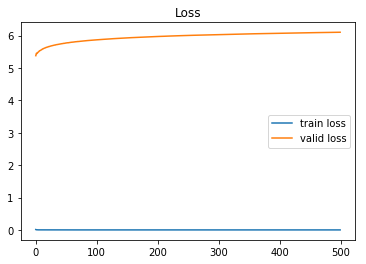

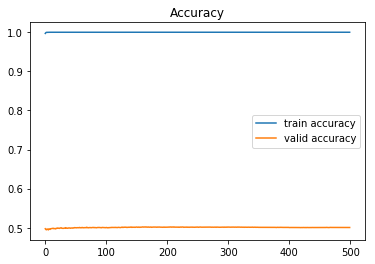

In [9]:

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()


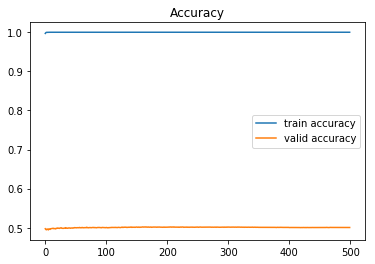

In [10]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()